In [17]:
import pandas as pd

# Ladda data
df = pd.read_csv('customer_data.csv')

# Visa första 5 rader
df.head()

,name,age,phone,email,purchase_frequency
0,Kivilä Becker,45,078--246711,kivilä.becker@distansakademin.se,medium
1,Charlie Rasmus,invalid_mail,079--597107,charlie.rasmus@distansakademin.se,medium
2,Alice Smith,invalid_mail,073--553280,alice.smith@distansakademin.se,high
3,Rafael Becker,invalid_age,076--778557,rafael.becker@distansakademin.se,medium
4,Alice Jackson,42,079--138676,alice.jackson@distansakademin.se,medium


In [19]:
# Datatyper och saknade värden
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                100 non-null    object 
 1   age                 73 non-null     float64
 2   phone               100 non-null    object 
 3   email               100 non-null    object 
 4   purchase_frequency  100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [22]:
import matplotlib.pyplot as plt
# Ladda data med explicit hantering av felaktiga värden
df1 = pd.read_csv('customer_data.csv', na_values=['invalid_age', 'invalid_mail'])

# Datakvalitetsrapport
data_quality = pd.DataFrame({
    'Missing Values': df1.isna().sum(),
    'Unique Values': df1.nunique(),
    'Data Types': df1.dtypes
})

print("DATA QUALITY REPORT:")
display(data_quality)

DATA QUALITY REPORT:


,Missing Values,Unique Values,Data Types
name,0,25,object
age,27,38,float64
phone,0,100,object
email,0,25,object
purchase_frequency,0,3,object


In [23]:
# Numerisk statistik (ålder etc)
df.describe()

,age
count,73.000000
mean,43.356164
std,14.521411
min,18.000000
25%,32.000000
50%,44.000000
75%,56.000000
max,65.000000


In [24]:
# Visa bara kunder med "high" köpfrekvens
df[df['purchase_frequency'] == 'high']

,name,age,phone,email,purchase_frequency
2,Alice Smith,NaN,073--553280,alice.smith@distansakademin.se,high
9,Charlie Jackson,58.0,075--812740,charlie.jackson@distansakademin.se,high
10,Charlie Rasmus,48.0,075--578991,charlie.rasmus@distansakademin.se,high
14,Bob Jackson,NaN,078--317470,bob.jackson@distansakademin.se,high
18,Bob Smith,42.0,079--374666,bob.smith@distansakademin.se,high
20,Rafael Smith,NaN,078--490092,rafael.smith@distansakademin.se,high
27,Rafael Larsson,51.0,078--395851,rafael.larsson@distansakademin.se,high
28,Charlie Larsson,52.0,074--801756,charlie.larsson@distansakademin.se,high
39,Rafael Jackson,54.0,072--395271,rafael.jackson@distansakademin.se,high
41,Bob Larsson,NaN,073--340713,bob.larsson@distansakademin.se,high


In [26]:
# Räkna köpfrekvens per kategori
df['purchase_frequency'].value_counts()

medium    45
low       28
high      27
Name: purchase_frequency, dtype: int64

<Axes: ylabel='Frequency'>

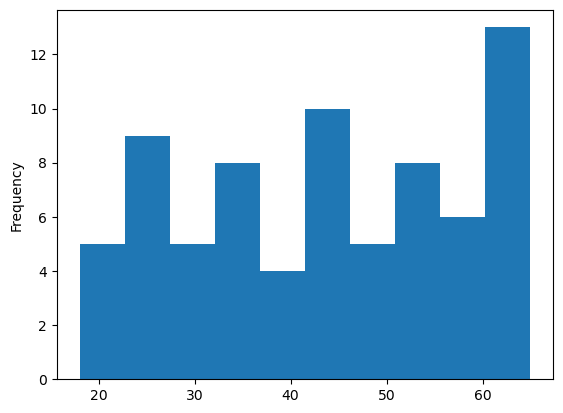

In [28]:
# Snabb plot av åldersfördelning
df['age'].plot(kind='hist', bins=10)

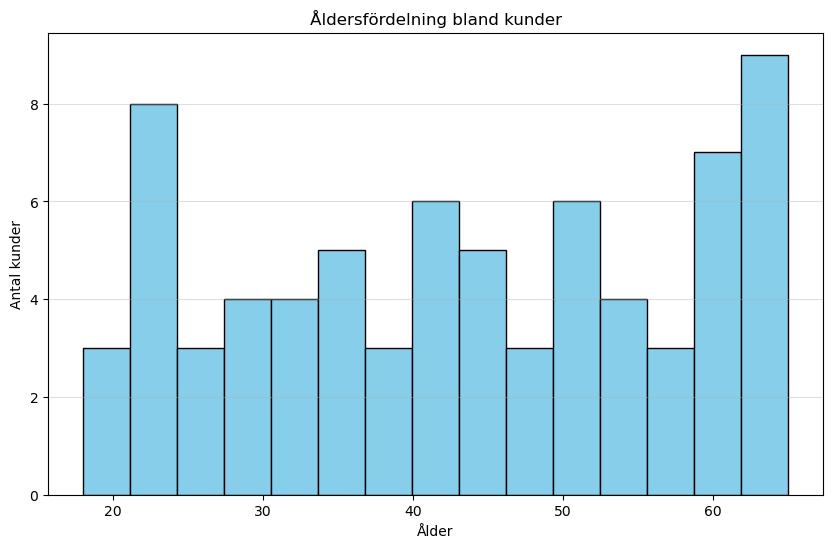

In [5]:
# Konvertera ålder till numerisk och filtrera bort NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Åldersfördelning bland kunder')
plt.xlabel('Ålder')
plt.ylabel('Antal kunder')
plt.grid(axis='y', alpha=0.4)
plt.show()